<hr>

##### Mount Drive - **Google Colab Only Step**

When using google colab in order to access files on our google drive we need to mount the drive by running the below python cell, then clicking the link it generates and pasting the code in the cell.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Change Directory To Access The Dependent Files - **Google Colab Only Step**

In [2]:
directory = "stusdent"
if (directory == "student"):
  %cd drive/Colab\ Notebooks/data-science-track/
else:
  %cd drive/Shared\ drives/Rubrik/Data\ Science/Course/Data-Science-Track

/content/drive/Shared drives/Rubrik/Data Science/Course/Data-Science-Track


<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Exercise:</span> Feature Engineering</h1>
<hr>
Welcome to the <span style="color:royalblue">Feature Engineering</span> Exercise! 

Remember, **better data beats better algorithms**.

### The Question
Eventually we will be trying to predict whether or not someone has left their job.

<br><hr id="toc">

### In this module...

In this module, we'll cover the essential steps for building your analytical base table:
1. [Engineer features](#engineer-features)
2. [Save the ABT (analytical base table)](#save-abt)

Finally, we'll save the ABT (analytical base table) to a new file so we can use it in other modules.

<br><hr>

### First, let's import libraries and load the dataset.

In general, it's good practice to keep all of your library imports at the top of your notebook or program.

We've provided comments for guidance.

#### Import numpy

In [0]:
import numpy as np

#### Import pandas

In [0]:
import pandas as pd

#### Import matplotlib

In [0]:
import matplotlib.pyplot as plt

#### Import seaborn

In [0]:
import seaborn as sns

#### Set the library configurations
Specifically use seaborn graphs rather than matplotlib's graphs and have pandas display all rows and columns

```python
sns.set() # make seaborn override the styling of matplotlib graphs
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.max_rows', None) # display all rows
```

In [0]:
# Library Configurations: 
sns.set() # make seaborn override the styling of matplotlib graphs
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.max_rows', None) # display all rows

## Import the cleaned employee dataset
- Use pandas' `read_csv()` function

#### Pandas' `read_csv()` parameters:
- `filepath_or_buffer` (string): path of csv to import

<br> 

Provide the following `filepath_or_buffer` for importing the data 
```python 
filepath_or_buffer = '../../data/employee-data-clean.csv'
```

In [0]:
# Load employee data from CSV
df = pd.read_csv('./data/employee-data-clean.csv')

<hr>

<br>

### Understand the data
#### Print the head of the dataset

In [9]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,last_evaluation_missing
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,Left,5.0,0
1,232,support,0.0,0.000000,3,0.0,low,0.834544,Employed,2.0,1
2,184,sales,0.0,0.788830,3,0.0,medium,0.834988,Employed,3.0,0
3,206,sales,0.0,0.575688,4,0.0,low,0.424764,Employed,2.0,0
4,249,sales,0.0,0.845217,3,0.0,low,0.779043,Employed,3.0,0


#### Display the dimensions of the dataset.
- Use the `.shape` property of the DataFrame to find out the shape of the dataset

In [10]:
# Dataframe dimensions
df.shape

(14068, 11)

#### Display the data types of our features
- Use the DataFrame's `info()` method to find out more about the DataFrame, such as the column data types and column names 

In [11]:
# Column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14068 entries, 0 to 14067
Data columns (total 11 columns):
avg_monthly_hrs            14068 non-null int64
department                 14068 non-null object
filed_complaint            14068 non-null float64
last_evaluation            14068 non-null float64
n_projects                 14068 non-null int64
recently_promoted          14068 non-null float64
salary                     14068 non-null object
satisfaction               14068 non-null float64
status                     14068 non-null object
tenure                     14068 non-null float64
last_evaluation_missing    14068 non-null int64
dtypes: float64(5), int64(3), object(3)
memory usage: 1.2+ MB



<br>
<hr>

<span id="engineer-features"></span>
# 1. Engineer features

<br>
Let us create a seaborn lmplot (scatterplot) for employees who have <code style="color:crimson">'Left'</code>with the following features: 

- <code style="color:steelblue">'satisfaction'</code>
- <code style="color:steelblue">'last_evaluation'</code>

### Create a boolean series of employees that have left and store it in a variable called `has_left`


In [0]:
# Create boolean series: `has_left` ... has this employee left?
has_left = df["status"] == "Left"

### Using the `has_left` boolean series create a DataFrame with the variable name of `left_df`

In [0]:
# index df by `has_left` to create `left_df`
left_df = df[has_left]

### Seaborn lmplot() Recap:
Seaborn's lmplot will allow you to create scatterplots, meaning comparing two numerical features for each data point. A data point being a single entry, or row, with multiple columns or otherwise refered to as features. This plot also allows you to attach additional information to each data point. This plot will allow you to see clustering of data relative to the feature values. 

#### `seaborn.lmplot()` parameters: 
- (optional) x (string: series name): specify numerical values for the x axis
- (optional) y (string: series name): specify numerical values for the y axis
- (optional) hue (string: series name): specify categorical values for the data point which helps us to group our data into clusters
- (optional) fit_reg (boolean): if `True`, estimate and plot a regression model relating the x and y variables
- (optional) height (float): height (in inches) of each facet, a particular aspect or feature of something
- (optional) aspect (float): width (in inches) of each facet, a particular aspect or feature of something
- data (DataFrame): data set for plotting 

[Seaborn lmplot Docs](https://seaborn.pydata.org/generated/seaborn.lmplot.html)

#### Example: 
```python
sns.lmplot(data=df, x='numerical_feature_one', y='numerical_feature_two', hue='categorical_feature')
plt.show()
```

#### Create a lmplot with the following parameter values:
  - `x` = 'satisfaction'
  - `y` = 'last_evaluation'
  - `height` = 10 
  - `fit_reg` = False

#### Note 
- we don't have to set the hue parameter, it's optional
- the default value for fit_reg is `True`, if you want to hide the estimate regression model lines then set the value of the `fit_reg` to False 

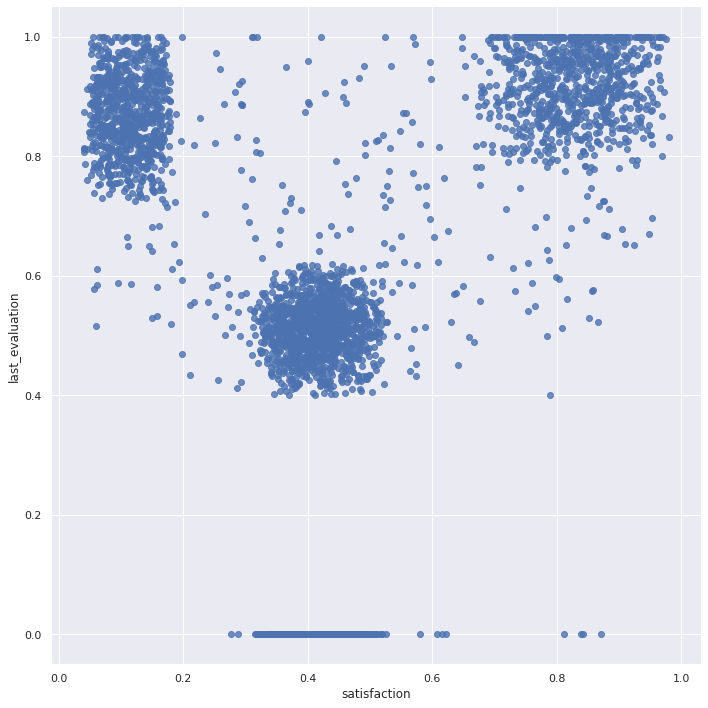

In [14]:
sns.lmplot(data=left_df, x='satisfaction', y='last_evaluation', fit_reg=False, height=10)
plt.show()

**These roughly translate to 3 indicator features that we can engineer:**

* <code style="color:steelblue">'underperformer'</code> - last_evaluation < 0.6 and last_evaluation_missing == 0
* <code style="color:steelblue">'unhappy'</code> - satisfaction < 0.2
* <code style="color:steelblue">'overachiever'</code> - last_evaluation > 0.8 and satisfaction > 0.7


<br>

### Create those 3 indicator features
* Use boolean series masks.
* **Important:** For <code style="color:steelblue">'underperformer'</code>, it's important to include: 
> <code style="color:steelblue">'last_evaluation_missing' == 0 </code> 
to avoid those originally missing observations that we flagged and filled, in the previous exercise.

## Create indicator features

Remember, we are making indicator variables by running boolean commands on a single column or combination of columns: `(bool_ser)` or `((bool_ser) & (bool_ser))`.


1. **This check will result in a boolean series like: `[True, False, True, False, False, ...]`,**


2. **We then use `.astype(int)` on that boolean series to convert it to an indicator variable which looks like: `[1,0,1,0,0, ...]`**

#### `df['underperformer']`

In [0]:
df['underperformer'] = ((df['last_evaluation'] < 0.6) & (df['last_evaluation_missing'] == 0)).astype(int)

#### `df['unhappy']`

In [0]:
df['unhappy'] = (df['satisfaction'] < 0.2).astype(int)

#### `df['overachiever']`

In [0]:
df['overachiever'] = ((df['last_evaluation'] > 0.8) & (df['satisfaction'] > 0.7)).astype(int)

<ber>

#### **Next, run code to check that you created the features correctly.**

### Display the proportion of our observations that are underperformers
- Use the series' `mean()` method to accomplish this 

In [18]:
# proportion underperformer
df['underperformer'].mean()

0.2852573215808928

### Display the proportion of our observations that are unhappy
- Use the series' `mean()` method to accomplish this 

In [19]:
# proportion unhappy
df['unhappy'].mean() 

0.09219505260164913

### Display the proportion of our observations that are overachievers
- Use the series' `mean()` method to accomplish this 

In [20]:
# proportion overachiever
df['overachiever'].mean()

0.1770685243104919

### Analysis Questions 
#### **Compare the proportions to the lmplot. Do the proportions make sense visually?** 


Yes, the proportions make sense.

#### **What happens if we change the `data` argument from `left_df` to `df`, do we still see the three different custers? Why did we use the left_df to plot the lmplot (scatterplot)?**

We will not see the three clusters, instead we will see more data points and will not be able to see the different clusters as easily. The reason is because we are comparing all 'status' values.

<hr>

### Give it a shot, create your own indicator feature
Tips:
- Use a lmplot to visualize clusters of different features


#### `seaborn.lmplot()` parameters: 
- (optional) x (string: series name): specify numerical values for the x axis
- (optional) y (string: series name): specify numerical values for the y axis
- (optional) hue (string: series name): specify categorical values for the data point which helps us to group our data into clusters
- (optional) fit_reg (boolean): if `True`, estimate and plot a regression model relating the x and y variables
- (optional) height (float): height (in inches) of each facet, a particular aspect or feature of something
- (optional) aspect (float): width (in inches) of each facet, a particular aspect or feature of something
- data (DataFrame): data set for plotting 

[Seaborn lmplot Docs](https://seaborn.pydata.org/generated/seaborn.lmplot.html)

#### Example: 
```python
sns.lmplot(data=df, x='numerical_feature_one', y='numerical_feature_two', hue='categorical_feature')
plt.show()
```

#### Note 
- we don't have to set the hue parameter, it's optional
- the default value for fit_reg is `True`, if you want to hide the estimate regression model lines then set the value of the `fit_reg` to False 

### Use lmplot with the following arguments:
- `data`=df
- `x`='n_projects'
- `y`='satisfaction'
- `hue`="status"
- `fit_reg`=False

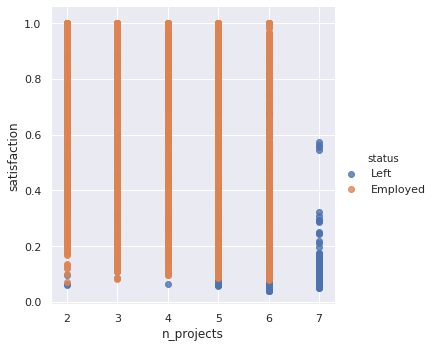

In [21]:
sns.lmplot(data=df, x='n_projects', y='satisfaction', hue="status", fit_reg=False) 
plt.show()

### Create indicator feature and save the series to the original DataFrame (df)

Remember, we are making indicator variables by running boolean commands on a single column or combination of columns: `(bool_ser)` or `((bool_ser) & (bool_ser))`.


1. **This check will result in a boolean series like: `[True, False, True, False, False, ...]`,**


2. **We then use `.astype(int)` on that boolean series to convert it to an indicator variable which looks like: `[1,0,1,0,0, ...]`**


#### `df['maybe_too_many_projects']`
- boolean series one: n_projects are greater than or equal to 4
- boolean series two: satisfaction is less than .3

In [0]:
df['maybe_too_many_projects'] = ((df['n_projects'] >= 4) & (df['satisfaction'] < 0.3)).astype(int)

### Display the proportion of our observations that maybe have too many projects
- Use the series' `mean()` method to accomplish this 

In [23]:
# proportion underperformer
df['maybe_too_many_projects'].mean()

0.11224054591981802

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="save-abt"></span>
# 2. Save the ABT

Finally, time to save the **analytical base table**. But FIRST, some final touches.

## Convert <code style="color:steelblue">'status'</code> into an indicator variable.
* <code style="color:crimson">'Left'</code> should be <code style="color:crimson">1</code>
* <code style="color:crimson">'Employed'</code> should be <code style="color:crimson">0</code>
* There's also a really easy way you can use <code style="color:steelblue">pd.get_dummies()</code> here.

#### `(boolean_series).astype(int)` approach

In [0]:
 # Convert status to an indicator variable
df['status'] = (df['status'] == 'Left').astype(int)

<br>

**To confirm we did that correctly, display the proportion of people in our dataset who left.**

In [25]:
# The proportion of observations who 'Left'
# if we have a series of 1s and 0s, what would the mean represent?
df['status'].mean()

0.23933750355416547

<br>

<hr>

## One-Hot Encode Categorical Variables

**Overwrite your dataframe with a version that has <span style="color:royalblue">dummy variables</span> for the categorical features**

#### Pandas `get_dummies()` method parameters:
- `data` (array-like, Series, or DataFrame): Data of which to get dummy indicators.
- `columns` (string, or list of strings): default None; Column names in the DataFrame to be encoded.

#### pd.get_dummies() returns: 
- The one-hot encoded version of the `df` you passed in

**Note:** The new column names will be the old column name prepended before the categorical value name, seperated by underscores 

In order for the DataFrame to be updated with the one hot encoded columns we will have to reassign the original DataFrame with the return of the DataFrame's `get_dummies()` method.

For Example: 
```python
df = pd.get_dummies(data=df, columns=cols_to_encode)
```

#### **Make a list with the names of the columns that you want to encode. We will choose all of the categorical columns.**

Let us encode the following categorical columns (series):
- department
- salary

### Create a list variable `cols_to_encode` with the column names

#### Note:
Here's a more generic approach, in case your dataframe has 40 categorical columns and you would rather have python populate the list for you

```python 
generic_list = df.dtypes[df.dtypes == "object"].index
```

In [0]:
cols_to_encode = ['department', 'salary']

### Using `pd.get_dummies()` encode the specified columns (series) from the original DataFrame 

#### Pandas get_dummies() method parameters:
- `data` (array-like, Series, or DataFrame): Data of which to get dummy indicators.
- `columns` (string, or list of strings): default None; Column names in the DataFrame to be encoded.

In [0]:
# Create new dataframe with dummy features
df = pd.get_dummies(data= df, columns=cols_to_encode)

<br>

<hr>

## Remove unused or redundant features

**Save <code style="color:steelblue">'status'</code> from your dataset, into the variable `target`.**

In [0]:
target = df['status']

**Drop <code style="color:steelblue">'status'</code> from your dataset.**
We will do this with using the DataFrame's `.drop()` method.

##### DataFrame's `drop()` parameters:
- `labels` (string or list of strings): index or column labels to drop
- `axis`  ({0 or ‘index’, 1 or ‘columns’}): default 0; whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’)
- `inplace` (bool): default False; If True, do operation inplace and return None.

In [0]:
df = df.drop(['status'], axis=1)

<br>

<hr>

<br>

### See the changes in data
#### Print the head of the dataset

In [30]:
df.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,last_evaluation_missing,underperformer,unhappy,overachiever,maybe_too_many_projects,department_IT,department_Missing,department_admin,department_engineering,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,5.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,232,0.0,0.000000,3,0.0,0.834544,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,206,0.0,0.575688,4,0.0,0.424764,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,249,0.0,0.845217,3,0.0,0.779043,3.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


##### Save the analytical base table and target!

Let's save the new dataframe using Pandas' <code style="color:steelblue">.to_csv()</code> function
- Pass in the value None as an argument to the `index` parameter, so that Pandas drops the indices and only stores the actual data in the CSV.

#### DataFrame's `to_csv()` Method Parameters:
- `path_or_buf` (string): File path of where to store DataFrame, if None is provided the result is returned as a string
- `index` (boolean or None): default True, Write row names (index).


### Save The Analytical Base DataFrame
- use the following argument value for the `path_or_buf` parameter:
```python
path_or_buf='./feature_engineered_employee_abt.csv'
```


In [0]:
# Save analytical base table
df.to_csv(path_or_buf='./feature_engineered_employee_abt.csv', index=None)

### Save The Target Variable DataFrame
- use the following argument value for the `path_or_buf` parameter:
```python
path_or_buf='./feature_engineered_employee_target.csv'
```

In [0]:
# Save Target
target.to_csv(path_or_buf='./feature_engineered_employee_target.csv', index=None)

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>